In [9]:
from sympy import *
init_printing()
x, y, z, u, r,k  = symbols('x y z u r k ')
alpha1, beta, omega_21 = symbols('alpha1 beta omega_2_1')
x, y, z, alpha1, beta, omega_21

In [5]:
#A en B zijn tegenpunten dus is het middelpunt van de bol het middel punt van AB 
M=(1,0,3) 
#straal r is dus de afstand van M tot punt A 

r= sqrt((3-1)**2+(2-0)**2+(2-3)**2)
#de straal is dus 3 

vglBol= Eq((x-1)**2+(y-0)**2+(z-3)**2,3**2)
vglBol

In [29]:
#we vullen x,y,z van de rechte in in onze bol vergelijking 

B= Eq((2*k)**2+(2+k-1)**2+(3-k-3)**2,9)
O =solve(B,k)
K1= O[0]
K2= O[1]
K1,K2

In [32]:
#nu weten we k en kunnen we deze invullen in de vergelijking van de rechte waardoor we 2 punten krijgen 
P1x=(2+K1)
P1y=(2*K1)
P1z=(3-K1)


P2x=(2+K2)
P2y=(2*K2)
P2z=(3-K2)

P1x.evalf(2),P1y.evalf(3),P1z.evalf(3),P2x.evalf(),P2y.evalf(),P2z.evalf()

#Dus we hebben ons eerste snijpunt P1(0.67,-2.67,4.33,)
#En ons tweede snijpunt P2(3,2,2)

In [35]:
#nu zoeken we de raakvlakken 
#dus zoeken we de normaalvector van de bol in deze punten

N1= (0.67-1,-2.67-0,4.33-3) 
N2= (3-1,2-0,2-3)
N1,N2

In [36]:
#nu kunnen we de vergelijking van de raakvlakken opstellen 

R1= -0.33*(x-0.67)-2.67*(y+2.67)+1.33*(z-4.33)
R1

In [37]:
R2= 2*(x-3)+2*(y-2)-1*(z-2)
R2

C:\Users\LiamW\AppData\Local\Temp\ipykernel_21800\1450877484.py:28: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


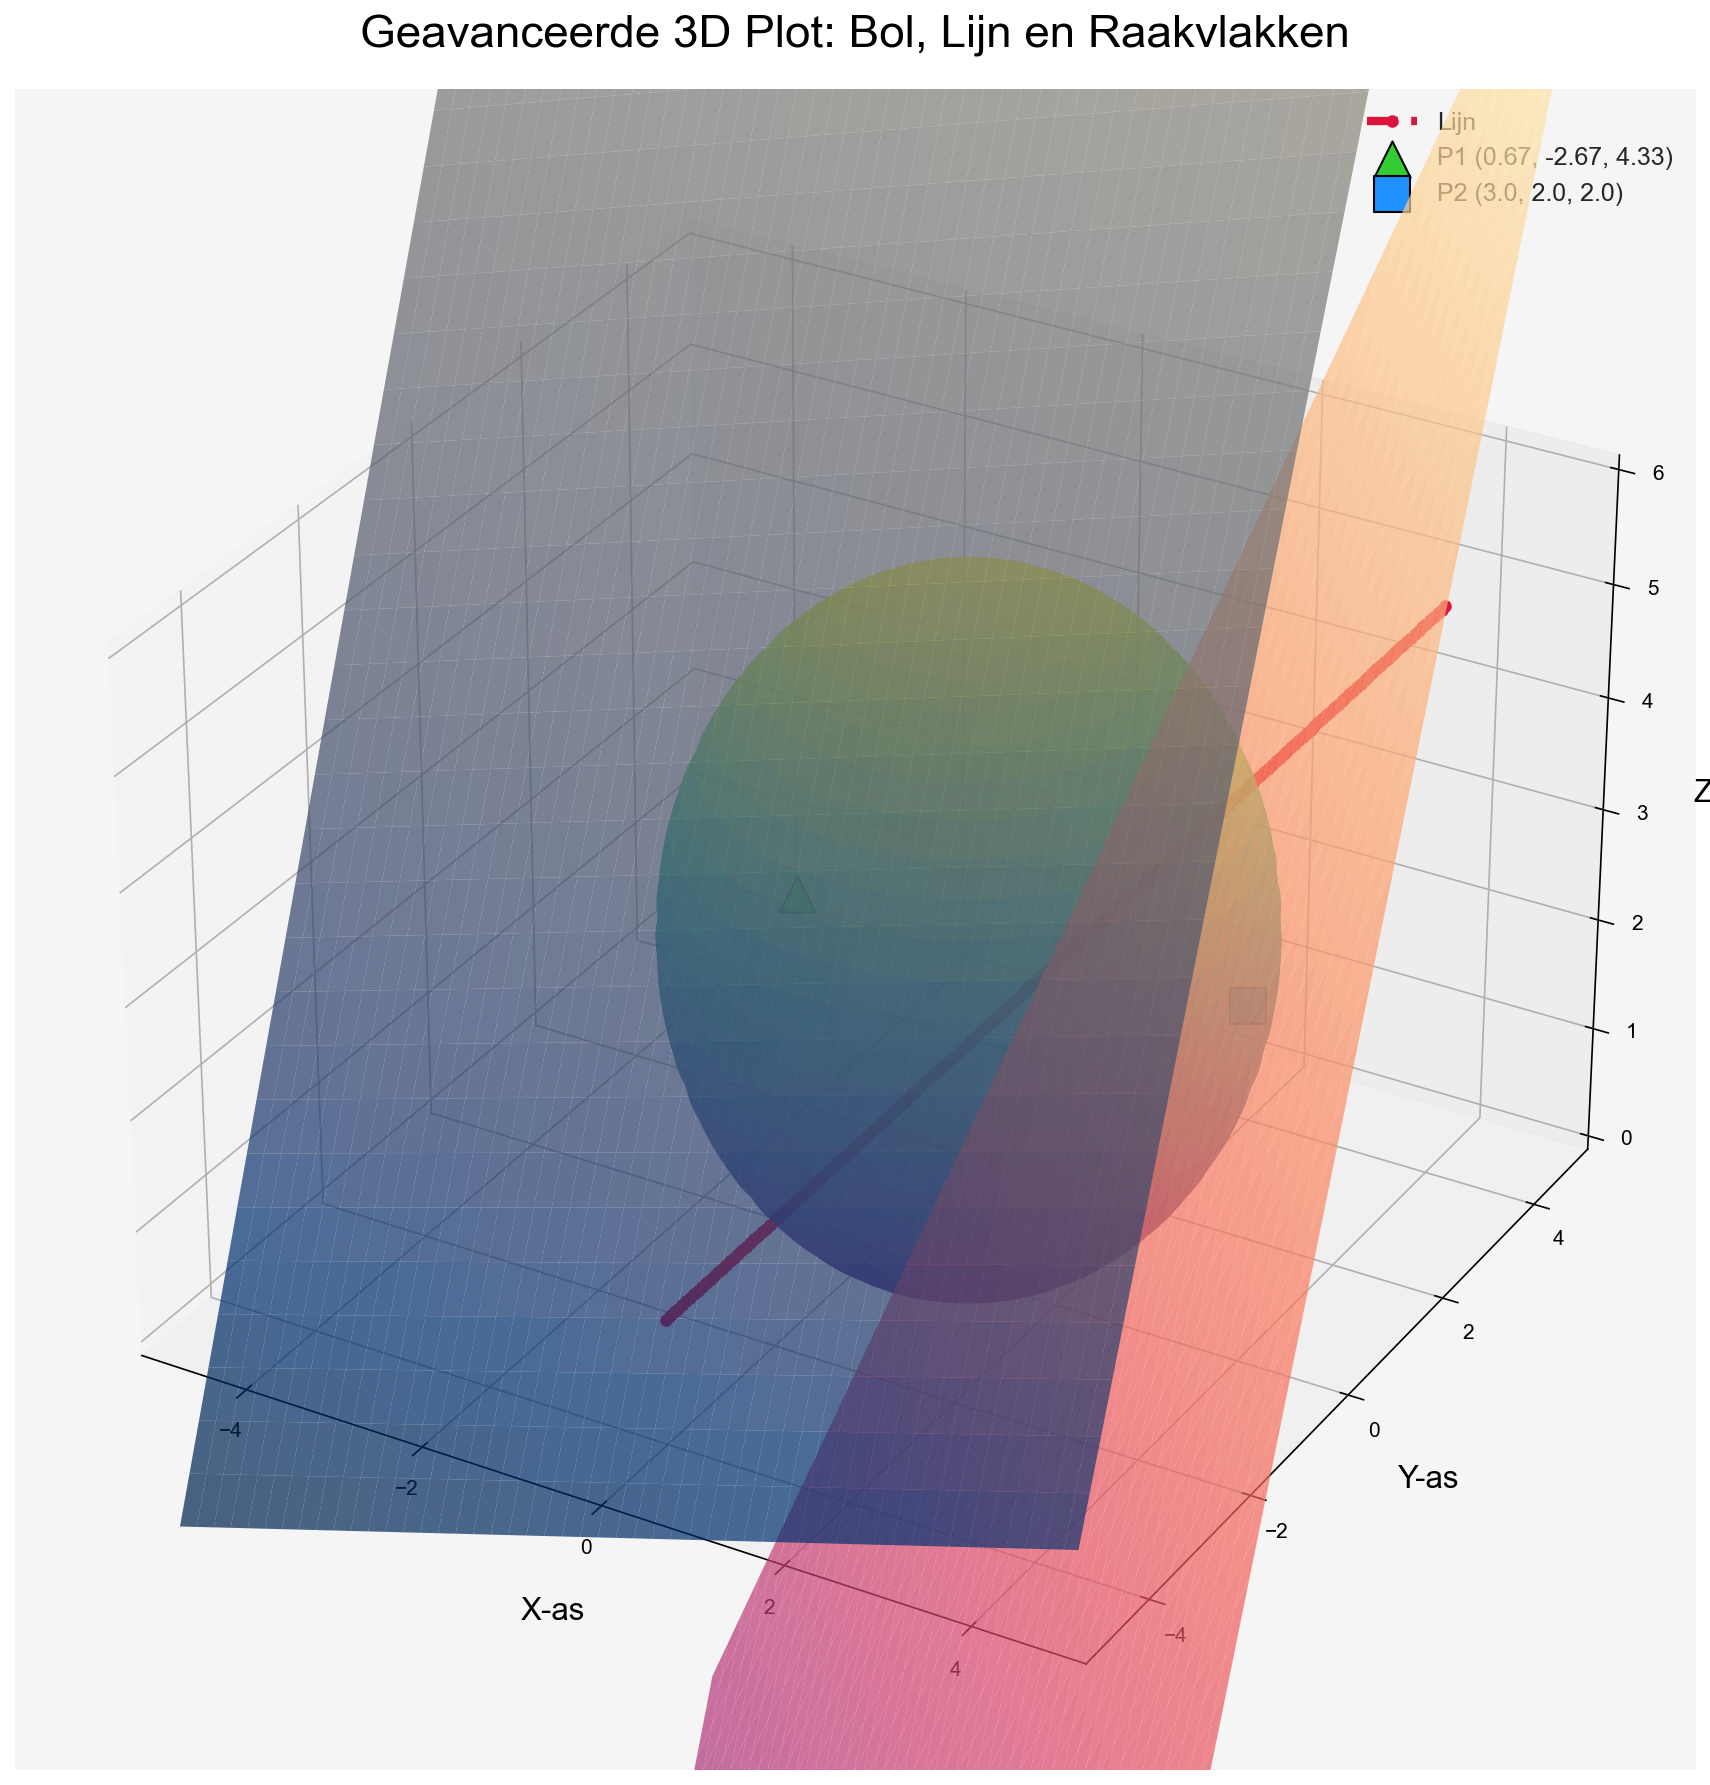

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Functie voor het plotten van een bol met verbeterde belichting en kleuren
def plot_sphere(ax, center, radius):
    u = np.linspace(0, 2 * np.pi, 300)
    v = np.linspace(0, np.pi, 300)
    x = center[0] + radius * np.outer(np.cos(u), np.sin(v))
    y = center[1] + radius * np.outer(np.sin(u), np.sin(v))
    z = center[2] + radius * np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, cmap='viridis', alpha=0.6, rstride=10, cstride=10, edgecolor='none', shade=True)

# Functie voor het plotten van een vlak met kleurverloop
def plot_plane(ax, plane_eq, x_range, y_range, color_map='plasma'):
    x = np.linspace(x_range[0], x_range[1], 200)
    y = np.linspace(y_range[0], y_range[1], 200)
    x, y = np.meshgrid(x, y)
    z = eval(plane_eq)  # Vervang het vlak in termen van x en y
    ax.plot_surface(x, y, z, cmap=color_map, alpha=0.7, edgecolor='none', linewidth=0, antialiased=True)

# Initialisatie van 3D-plot met verbeterde afmetingen en resolutie
fig = plt.figure(figsize=(12, 12), dpi=150)
ax = fig.add_subplot(111, projection='3d')

# Verbeterde stijl voor de plot
plt.style.use('seaborn-darkgrid')
ax.set_facecolor('whitesmoke')

# 1. Plot van de bol
bol_center = (1, 0, 3)
bol_radius = 3
plot_sphere(ax, bol_center, bol_radius)

# 2. Plot van de lijn met een bredere en gekleurde stijl
t = np.linspace(-2, 2, 200)
lijn_x = 2 - t
lijn_y = -2 * t
lijn_z = 3 - t
ax.plot(lijn_x, lijn_y, lijn_z, color='crimson', linewidth=4, linestyle='--', label='Lijn', marker='o', markersize=5)

# 3. Plot van het eerste raakvlak (-0.33x − 2.67y + 1.33z = 12.6667)
vlak1_eq = '(12.6667 + 0.33 * x + 2.67 * y) / 1.33'
plot_plane(ax, vlak1_eq, (-5, 5), (-5, 5), color_map='cividis')

# 4. Plot van het tweede raakvlak (2x + 2y − z = 8)
vlak2_eq = '2*x + 2*y - 8'
plot_plane(ax, vlak2_eq, (-5, 5), (-5, 5), color_map='magma')

# 5. Plot van de snijpunten met verbeterde markers
P1 = (0.67, -2.67, 4.33)
P2 = (3.0, 2.0, 2.0)
ax.scatter(*P1, color='limegreen', s=300, marker='^', label='P1 (0.67, -2.67, 4.33)', depthshade=True, edgecolors='black')
ax.scatter(*P2, color='dodgerblue', s=300, marker='s', label='P2 (3.0, 2.0, 2.0)', depthshade=True, edgecolors='black')

# Labels en limieten
ax.set_xlabel('X-as', fontsize=15, labelpad=15)
ax.set_ylabel('Y-as', fontsize=15, labelpad=15)
ax.set_zlabel('Z-as', fontsize=15, labelpad=15)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([0, 6])
ax.legend(fontsize=12)

# Titels en zichtbaarheid verbeteren
ax.set_title('Geavanceerde 3D Plot: Bol, Lijn en Raakvlakken', fontsize=22, pad=20)
ax.view_init(elev=30, azim=-60)  # Verbeter de kijkhoek voor diepte

# Toon de plot met strakke marges
plt.tight_layout()
plt.show()


C:\Users\LiamW\AppData\Local\Temp\ipykernel_21800\3953936813.py:28: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


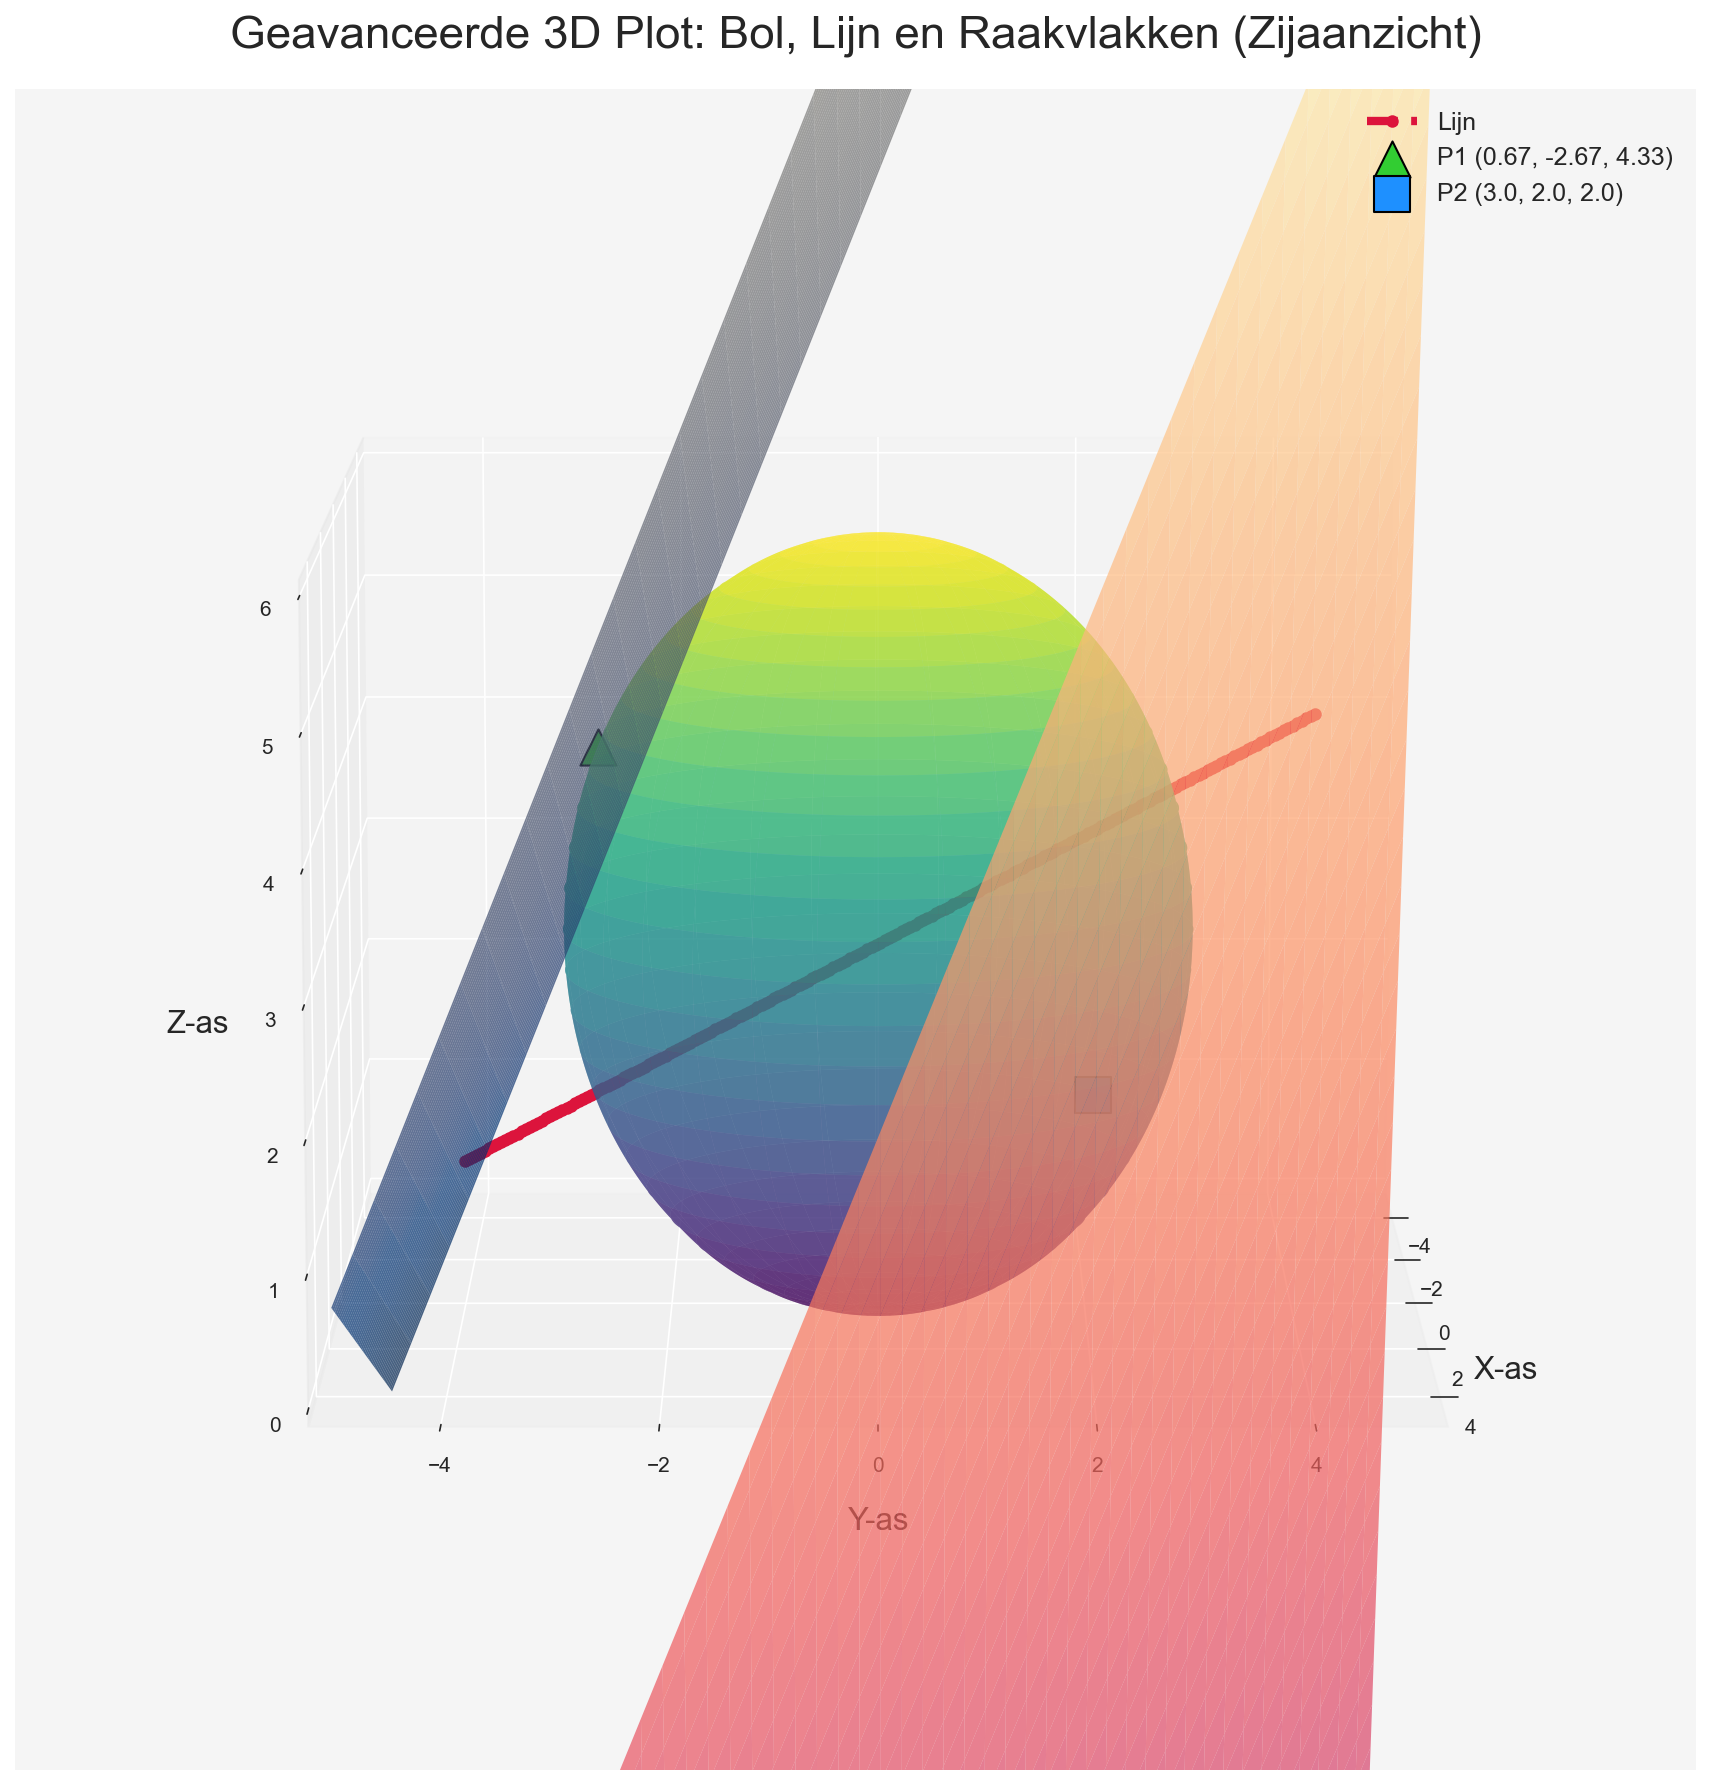

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Functie voor het plotten van een bol met verbeterde belichting en kleuren
def plot_sphere(ax, center, radius):
    u = np.linspace(0, 2 * np.pi, 300)
    v = np.linspace(0, np.pi, 300)
    x = center[0] + radius * np.outer(np.cos(u), np.sin(v))
    y = center[1] + radius * np.outer(np.sin(u), np.sin(v))
    z = center[2] + radius * np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, cmap='viridis', alpha=0.6, rstride=10, cstride=10, edgecolor='none', shade=True)

# Functie voor het plotten van een vlak met kleurverloop
def plot_plane(ax, plane_eq, x_range, y_range, color_map='plasma'):
    x = np.linspace(x_range[0], x_range[1], 200)
    y = np.linspace(y_range[0], y_range[1], 200)
    x, y = np.meshgrid(x, y)
    z = eval(plane_eq)  # Vervang het vlak in termen van x en y
    ax.plot_surface(x, y, z, cmap=color_map, alpha=0.7, edgecolor='none', linewidth=0, antialiased=True)

# Initialisatie van 3D-plot met verbeterde afmetingen en resolutie
fig = plt.figure(figsize=(12, 12), dpi=150)
ax = fig.add_subplot(111, projection='3d')

# Verbeterde stijl voor de plot
plt.style.use('seaborn-darkgrid')
ax.set_facecolor('whitesmoke')

# 1. Plot van de bol
bol_center = (1, 0, 3)
bol_radius = 3
plot_sphere(ax, bol_center, bol_radius)

# 2. Plot van de lijn met een bredere en gekleurde stijl
t = np.linspace(-2, 2, 200)
lijn_x = 2 - t
lijn_y = -2 * t
lijn_z = 3 - t
ax.plot(lijn_x, lijn_y, lijn_z, color='crimson', linewidth=4, linestyle='--', label='Lijn', marker='o', markersize=5)

# 3. Plot van het eerste raakvlak (-0.33x − 2.67y + 1.33z = 12.6667)
vlak1_eq = '(12.6667 + 0.33 * x + 2.67 * y) / 1.33'
plot_plane(ax, vlak1_eq, (-5, 5), (-5, 5), color_map='cividis')

# 4. Plot van het tweede raakvlak (2x + 2y − z = 8)
vlak2_eq = '2*x + 2*y - 8'
plot_plane(ax, vlak2_eq, (-5, 5), (-5, 5), color_map='magma')

# 5. Plot van de snijpunten met verbeterde markers
P1 = (0.67, -2.67, 4.33)
P2 = (3.0, 2.0, 2.0)
ax.scatter(*P1, color='limegreen', s=300, marker='^', label='P1 (0.67, -2.67, 4.33)', depthshade=True, edgecolors='black')
ax.scatter(*P2, color='dodgerblue', s=300, marker='s', label='P2 (3.0, 2.0, 2.0)', depthshade=True, edgecolors='black')

# Labels en limieten
ax.set_xlabel('X-as', fontsize=15, labelpad=15)
ax.set_ylabel('Y-as', fontsize=15, labelpad=15)
ax.set_zlabel('Z-as', fontsize=15, labelpad=15)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([0, 6])
ax.legend(fontsize=12)

# Titels en zichtbaarheid verbeteren
ax.set_title('Geavanceerde 3D Plot: Bol, Lijn en Raakvlakken (Zijaanzicht)', fontsize=22, pad=20)
ax.view_init(elev=10, azim=0)  # Pas de kijkhoek aan voor een zijaanzicht

# Toon de plot met strakke marges
plt.tight_layout()
plt.show()
